In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
url = "https://gist.githubusercontent.com/ryanorsinger/3fce5a65b5fb8ab728af5192c7de857e/raw/a0422b7b73749842611742a1064e99088a47917d/clean_telco.csv"
df = pd.read_csv(url, index_col="id")
df.head(4).T

id,0,1,2,3
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF
gender,Female,Male,Male,Male
is_senior_citizen,0,0,0,1
partner,Yes,No,No,Yes
dependents,Yes,No,No,No
phone_service,1,2,1,1
internet_service,1,1,2,2
contract_int,1,0,0,0
payment_type,Mailed check,Mailed check,Electronic check,Electronic check
monthly_charges,65.6,59.9,73.9,98


## Exercise 1

Use the telco_churn data. Does tenure correlate with monthly charges? Total charges?

What happens if you control for phone and internet service?

- $H_o$: tenure and monthly charges are not linearly correlated
- $H_a$: tenure and monthly charges are linearly correlated

then

- $H_o$: tenure and total charges are not linearly correlated
- $H_a$: tenure and total charges are linearly correlated

then

Control for Phone and Internet Service

In [3]:
confidence_level = 0.95
alpha = 1 - confidence_level

In [4]:
# 𝐻𝑜 : tenure and monthly charges are not linearly correlated
# 𝐻𝑎 : tenure and monthly charges are linearly correlated

corr, p = stats.pearsonr(df.tenure_month, df.monthly_charges)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    
corr, p

We reject the null hypothesis


(0.24602222678861568, 1.8834273042626366e-97)

In [5]:
# 𝐻𝑜 : tenure and total charges are not linearly correlated
# 𝐻𝑎 : tenure and total charges are linearly correlated

corr, p = stats.pearsonr(df.tenure_month, df.total_charges)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    
corr, p

We reject the null hypothesis


(0.8257328669183064, 0.0)

In [25]:
def correlation_test(x, y):
    message = ""
    corr, p = stats.pearsonr(x, y)
    
    if p < alpha:
        message = "reject the null hypothesis that there is no linear correlation. Evidence supports a linear correlation." 
    else:
        message = "fail to reject the null hypothesis that there is no linear correlation. Insufficient evidence to support a linear correlation between the two values."
    
    return corr, p, message

### How to Control for Variables
- Perform your original analysis in a way that removes the variable we're trying to control out of the question.
- If we control for phone service, and test for linear correlation between `tenure` and `monthly_charges`, then we will create a `no_phone` and a `phone` group then check their `tenure` to `monthly_charges` correlation w/ the Pearson's test
- If we also control for internet connection, we'll need to produce each pairing of subsets

In [26]:
# We'll run a correlation test for 
df.phone_type.value_counts()

One Line             3386
Two or More Lines    2966
No Phone Service      680
Name: phone_type, dtype: int64

In [27]:
df.internet_type.value_counts()

Fiber Optic            3097
DSL                    2413
No Internet Service    1522
Name: internet_type, dtype: int64

In [28]:
# Let's combine all these different values together
df["telecom_setup"] = df.internet_type + " " + df.phone_type

In [29]:
df.telecom_setup.value_counts()

Fiber Optic Two or More Lines            1937
No Internet Service One Line             1182
Fiber Optic One Line                     1160
DSL One Line                             1044
DSL Two or More Lines                     689
DSL No Phone Service                      680
No Internet Service Two or More Lines     340
Name: telecom_setup, dtype: int64

In [30]:
options = df.telecom_setup.value_counts().index
options

Index(['Fiber Optic Two or More Lines', 'No Internet Service One Line',
       'Fiber Optic One Line', 'DSL One Line', 'DSL Two or More Lines',
       'DSL No Phone Service', 'No Internet Service Two or More Lines'],
      dtype='object')

In [31]:
df[df.telecom_setup == "No Internet Service One Line"]

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_int,payment_type,monthly_charges,...,has_churned,has_phone,has_internet,has_internet_and_phone,partner_dependents,start_day,phone_type,internet_type,contract_type,telecom_setup
id,,,,,,,,,,,,,,,,,,,,,
23,0030-FNXPP,Female,0,No,No,1,0,0,Mailed check,19.85,...,False,True,False,False,0,2020-12-03,One Line,No Internet Service,Month-to-Month,No Internet Service One Line
24,0031-PVLZI,Female,0,Yes,Yes,1,0,0,Mailed check,20.35,...,True,True,False,False,3,2020-11-03,One Line,No Internet Service,Month-to-Month,No Internet Service One Line
27,0040-HALCW,Male,0,Yes,Yes,1,0,2,Credit card (automatic),20.40,...,False,True,False,False,3,2016-09-03,One Line,No Internet Service,2 Year,No Internet Service One Line
28,0042-JVWOJ,Male,0,No,No,1,0,1,Bank transfer (automatic),19.60,...,False,True,False,False,0,2019-02-03,One Line,No Internet Service,1 Year,No Internet Service One Line
29,0042-RLHYP,Female,0,Yes,Yes,1,0,2,Bank transfer (automatic),19.70,...,False,True,False,False,3,2015-04-03,One Line,No Internet Service,2 Year,No Internet Service One Line
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9975-SKRNR,Male,0,Yes,Yes,1,0,2,Credit card (automatic),20.40,...,False,True,False,False,3,2016-09-03,One Line,No Internet Service,2 Year,No Internet Service One Line
7034,9978-HYCIN,Male,0,No,No,1,0,1,Bank transfer (automatic),19.60,...,False,True,False,False,0,2019-02-03,One Line,No Internet Service,1 Year,No Internet Service One Line
7035,9979-RGMZT,Female,0,Yes,Yes,1,0,2,Bank transfer (automatic),19.70,...,False,True,False,False,3,2015-04-03,One Line,No Internet Service,2 Year,No Internet Service One Line


In [32]:
# Run through the set of all options for tenure vs. monthly_charges

output = []

for option in options:
    subset = df[df.telecom_setup == option]
    corr, p, message = correlation_test(subset.tenure_month, subset.monthly_charges)
    result = {
        "option": option,
        "corr": corr,
        "p": p,
        "message": message
    }
    output.append(result)

print("Correlation test for tenure vs. monthly_charges, controling for Internet/Phone service")
pd.DataFrame(output)

Correlation test for tenure vs. monthly_charges, controling for Internet/Phone service


,option,corr,p,message
0,Fiber Optic Two or More Lines,0.573677,6.125936e-170,reject the null hypothesis that there is no li...
1,No Internet Service One Line,-0.012010,6.799938e-01,fail to reject the null hypothesis that there ...
2,Fiber Optic One Line,0.529938,5.607453e-85,reject the null hypothesis that there is no li...
3,DSL One Line,0.561734,7.199649e-88,reject the null hypothesis that there is no li...
4,DSL Two or More Lines,0.610191,1.647669e-71,reject the null hypothesis that there is no li...
5,DSL No Phone Service,0.591798,1.736039e-65,reject the null hypothesis that there is no li...
6,No Internet Service Two or More Lines,-0.031353,5.645227e-01,fail to reject the null hypothesis that there ...


<AxesSubplot:xlabel='tenure_month', ylabel='monthly_charges'>

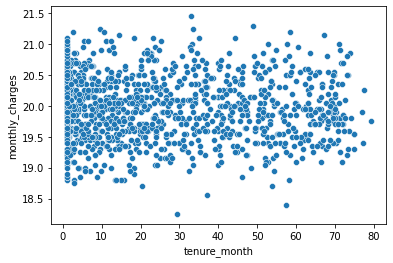

In [35]:
no_internet_one_line = df[df.telecom_setup == "No Internet Service One Line"]
sns.scatterplot(x="tenure_month", y="monthly_charges", data=no_internet_one_line)

<AxesSubplot:xlabel='tenure_month', ylabel='monthly_charges'>

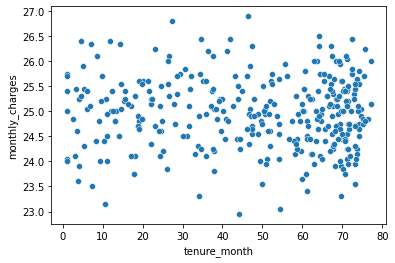

In [36]:
no_internet_multiple_lines = df[df.telecom_setup == "No Internet Service Two or More Lines"]
sns.scatterplot(x="tenure_month", y="monthly_charges", data=no_internet_multiple_lines)

In [33]:
# Run through the set of all options for tenure vs. total_charges

output = []

for option in options:
    subset = df[df.telecom_setup == option]
    corr, p, message = correlation_test(subset.tenure_month, subset.total_charges)
    result = {
        "option": option,
        "corr": corr,
        "p": p,
        "message": message
    }
    output.append(result)

print("Correlation test for tenure vs. total_charges, controling for Internet/Phone service") 
pd.DataFrame(output)

Correlation test for tenure vs. total_charges, controling for Internet/Phone service


,option,corr,p,message
0,Fiber Optic Two or More Lines,0.983949,0.0,reject the null hypothesis that there is no li...
1,No Internet Service One Line,0.999276,0.0,reject the null hypothesis that there is no li...
2,Fiber Optic One Line,0.987473,0.0,reject the null hypothesis that there is no li...
3,DSL One Line,0.974246,0.0,reject the null hypothesis that there is no li...
4,DSL Two or More Lines,0.967037,0.0,reject the null hypothesis that there is no li...
5,DSL No Phone Service,0.954261,0.0,reject the null hypothesis that there is no li...
6,No Internet Service Two or More Lines,0.998031,0.0,reject the null hypothesis that there is no li...
